In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [7]:
class Bandit:
  def __init__(self, p):
    self.p = p
    self.p_estimate = 5.
    self.N = 1.

  def pull(self):
    # draw 1 with probability p
    return np.random.random() < self.p

  def update(self, x):
    self.N += 1.
    self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N

In [8]:
def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  rewards = np.zeros(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # use optimistic initial values to select the next bandit
    j = np.argmax([b.p_estimate for b in bandits])

    x = bandits[j].pull()

    bandits[j].update(x)

    rewards[i] = x

  for b in bandits:
    print("mean estimate:", b.p_estimate)

  # print total reward
  print("total reward earned:", rewards.sum())
  print("overall win rate:", rewards.sum() / NUM_TRIALS)
  print("num of times selected each bandit:", [b.N for b in bandits])

  # plot the results

  cumulative_rewards = np.cumsum(rewards)
  win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
  plt.ylim([0, 1])
  plt.plot(win_rates)
  plt.plot(win_rates)
  plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))
  plt.show()

mean estimate: 0.6666666666666666
mean estimate: 0.7368421052631579
mean estimate: 0.7472681704260645
total reward earned: 7459.0
overall win rate: 0.7459
num of times selected each bandit: [9.0, 19.0, 9975.0]


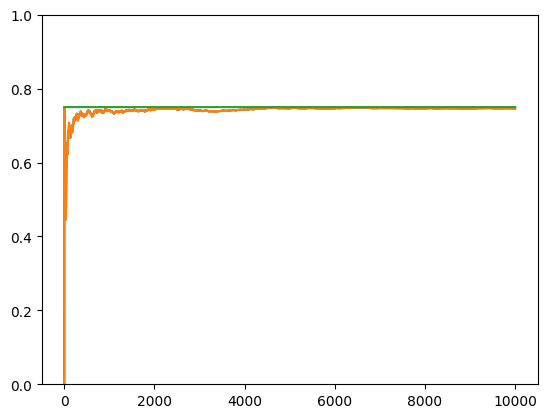

In [9]:
experiment()